In [32]:
!pip3 install opencv-python
!pip3 install tqdm
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm


In [33]:
IMG_SIZE = 64
TRAIN_DIR = 'train'   
TEST_DIR = 'test1'    
LIMIT = 2000

In [34]:
def load_train_data(limit=LIMIT):
    X, y = [], []
    count = {"cat": 0, "dog": 0}
    for img_name in tqdm(os.listdir(TRAIN_DIR)):
        label = 0 if "cat" in img_name else 1
        if label == 0 and count["cat"] >= limit // 2:
            continue
        if label == 1 and count["dog"] >= limit // 2:
            continue
        try:
            img_path = os.path.join(TRAIN_DIR, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img.flatten())  # Flatten for SVM
            y.append(label)
            if label == 0:
                count["cat"] += 1
            else:
                count["dog"] += 1
        except:
            pass
    return np.array(X), np.array(y)

In [35]:
def load_test_data():
    X_test, image_ids = [], []
    for img_name in tqdm(sorted(os.listdir(TEST_DIR), key=lambda x: int(x.split('.')[0]))):
        try:
            img_path = os.path.join(TEST_DIR, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X_test.append(img.flatten())
            image_ids.append(int(img_name.split('.')[0]))
        except:
            pass
    return np.array(X_test), image_ids


In [36]:
X, y = load_train_data()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)


100%|██████████████████████████████████| 25000/25000 [00:01<00:00, 18061.65it/s]


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
y_pred_val = svm.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

Validation Accuracy: 0.5525
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       205
           1       0.55      0.49      0.51       195

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400

Confusion Matrix:
 [[126  79]
 [100  95]]


In [38]:
X_test, test_ids = load_test_data()
y_test_pred = svm.predict(X_test)


100%|███████████████████████████████████| 12500/12500 [00:10<00:00, 1230.79it/s]


In [44]:
submission = pd.DataFrame({'id': test_ids, 'label': y_test_pred})
submission.sort_values('id', inplace=True)
submission.to_csv('submission.csv', index=False)
print("submission.csv file saved.")

submission.csv file saved.


In [45]:
def show_sample_images(X_data, y_pred, label_map={0: 'Cat', 1: 'Dog'}):
    X_imgs = X_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(cv2.cvtColor(X_imgs[i], cv2.COLOR_BGR2RGB))
        plt.title(label_map[y_pred[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

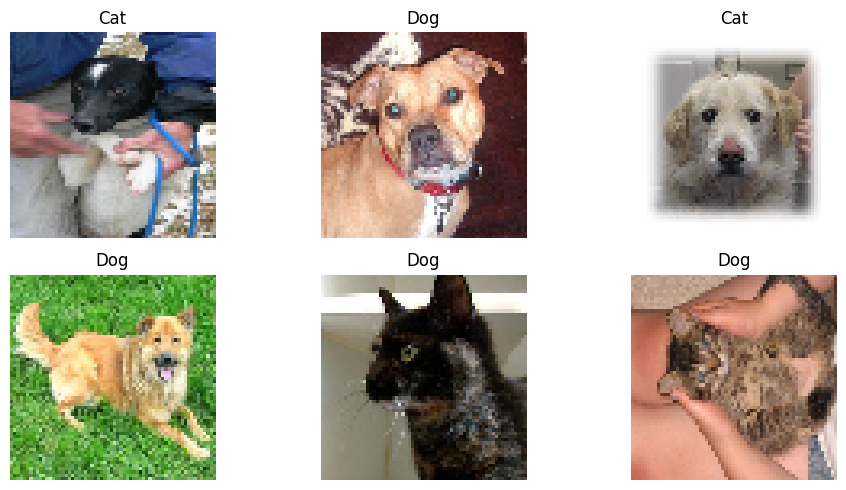

In [46]:
show_sample_images(X_test, y_test_pred)